# 분석 환경
* **OS**: Ubuntu 18.04.2 LTS
* **Language**: Python 3.7.2
* **Library**:
* numpy 1.16.1
* pandas 0.24.1
* sklearn 0.0.9
* matplotlib 3.0.2

In [1]:
from datetime import datetime
import time

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c
from sklearn.linear_model import LassoCV
import sklearn.model_selection

# 데이터 불러오기
* raw data 이름: rawdata <br />
* 데이터 포맷: txt file <br />
* 데이터 구분자: 한 칸 이상의 공백 <br />


In [2]:
## 데이터 불러오기 
rawdata = pd.read_csv("./housing_data.txt", sep="\s+", header=None)
## 열(column) 이름 설정
rawdata.columns = ["CRIM", "ZN", "INDUS", "CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO", "B", "LSTAT","MEDV"]

In [3]:
# 로우 데이터 확인
rawdata.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
# 전체 행 수 n = 506
# 전체 열 수 p = 14
n, p = rawdata.shape

##  트레이닝, 테스트 데이터 나누기
* Training data : 404 row(80%) <br />
* Test data : 102 row(20%)

In [5]:
# X, Y data
x_raw = rawdata.iloc[:, 0:13]
y_raw = rawdata.iloc[:, 13]

train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(x_raw, y_raw, test_size = 0.2, random_state=2357 ) 

### null 값 체크, null 값 존재하지 않음

In [6]:
train_x.isnull().sum() # train_x 데이터 널 값 체크

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
train_y.isnull().sum() # train_y 데이터 널 값 체크

0

In [8]:
test_x.isnull().sum() # text_x 데이터 널 값 체크

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
test_y.isnull().sum() # test_y 데이터 널 값 체크

0

# 탐색적 자료 분석

In [10]:
train_x.describe() # 트레이닝 데이터 기초 통계량 요약

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.262956,11.733911,10.954356,0.076733,0.552274,6.301433,67.677723,3.831537,9.269802,401.368812,18.383416,359.642599,12.356881
std,8.052195,23.710472,6.878348,0.266497,0.116741,0.726747,28.435612,2.099385,8.636812,167.482335,2.157794,86.938206,7.275672
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,3.500000,1.730000
25%,0.071615,0.000000,4.950000,0.000000,0.448000,5.888000,42.050000,2.111750,4.000000,277.000000,17.225000,376.745000,6.720000
50%,0.227290,0.000000,8.560000,0.000000,0.524000,6.229500,76.500000,3.298600,5.000000,329.000000,18.700000,391.565000,10.530000
75%,2.904685,12.500000,18.100000,0.000000,0.624000,6.635000,93.950000,5.218725,12.000000,666.000000,20.200000,396.307500,16.457500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


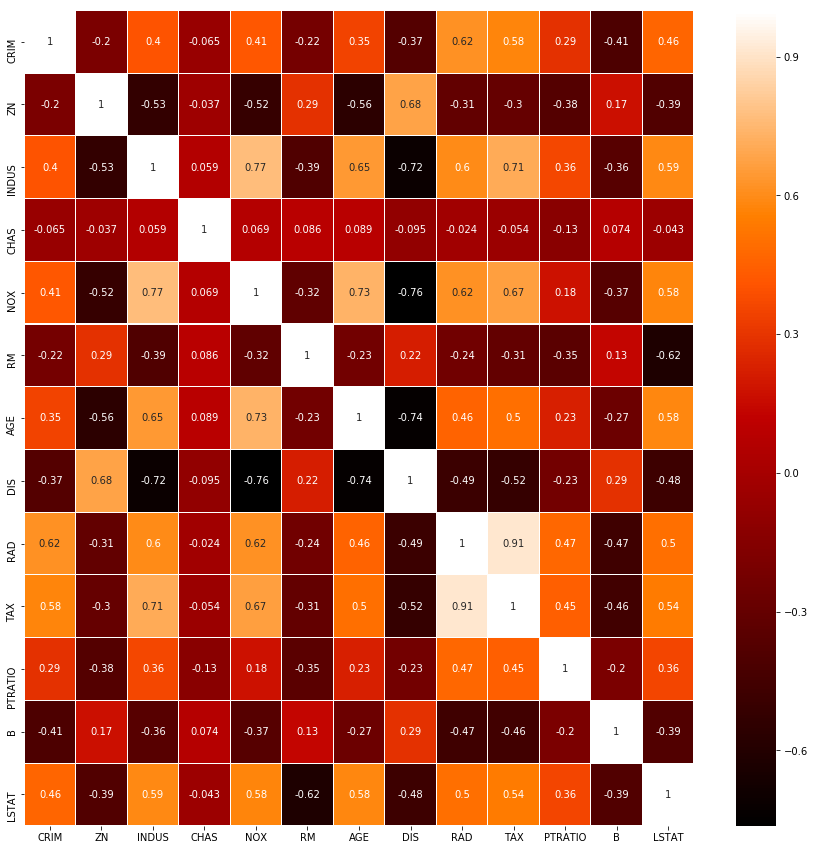

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_x.corr(), linewidths=0.1, vmax=1, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

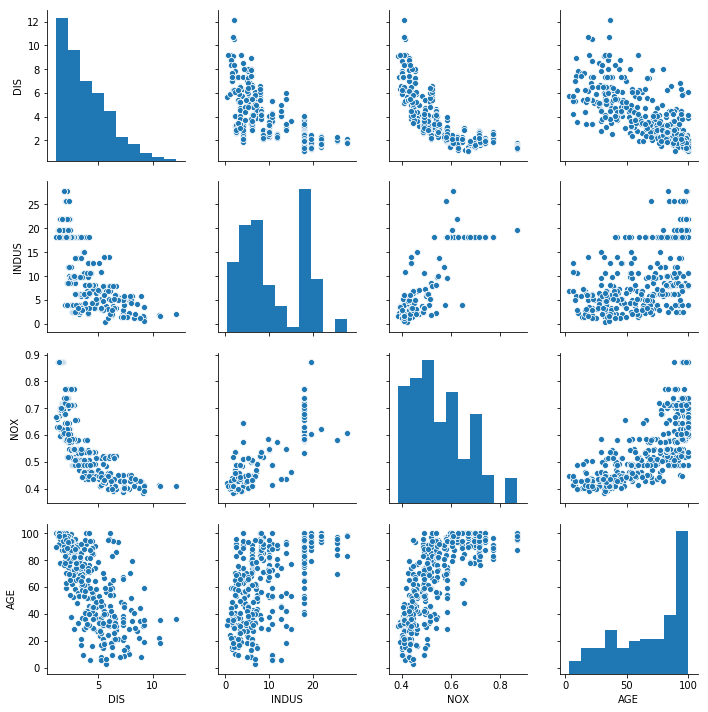

In [177]:
sns.pairplot(train_x, vars=["DIS", "INDUS","NOX","AGE"])

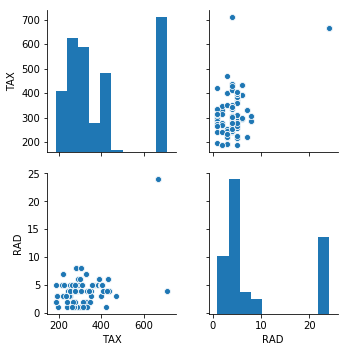

In [178]:
sns.pairplot(train_x, vars=["TAX", "RAD"])

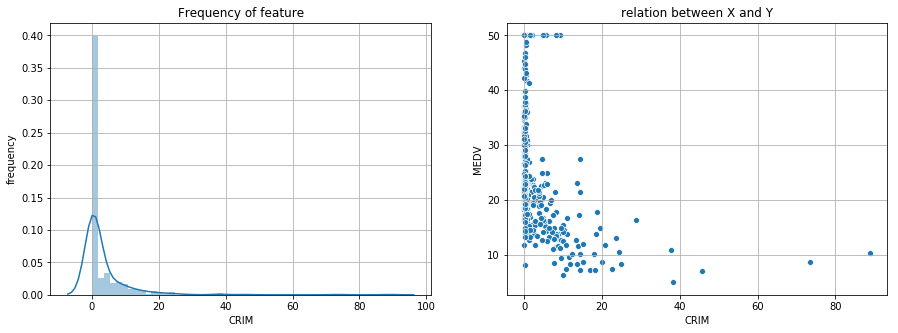

In [30]:
#  타운 별 1이당 범죄율 히스토그램
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['CRIM'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['CRIM'], train_y)
plt.show()

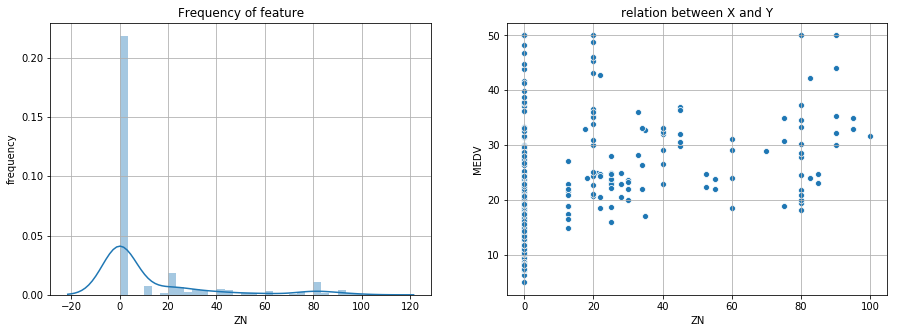

In [31]:
# 25000 평방미터 초과 거주지역 비율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['ZN'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['ZN'], train_y)
plt.show()

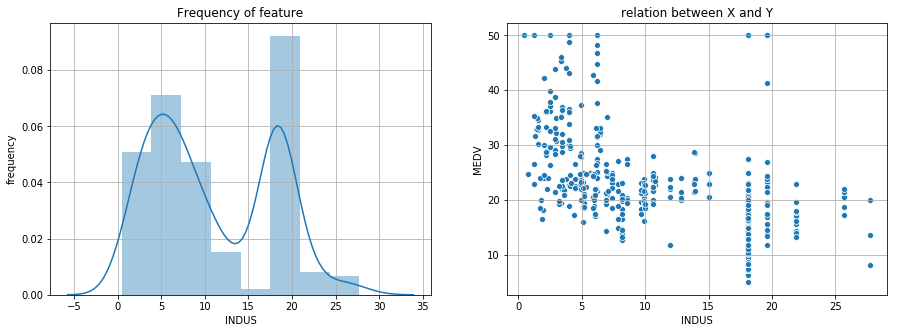

In [32]:
# 비소매 상업지역이 점유하고 있는 토지의 비율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['INDUS'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['INDUS'], train_y)
plt.show()

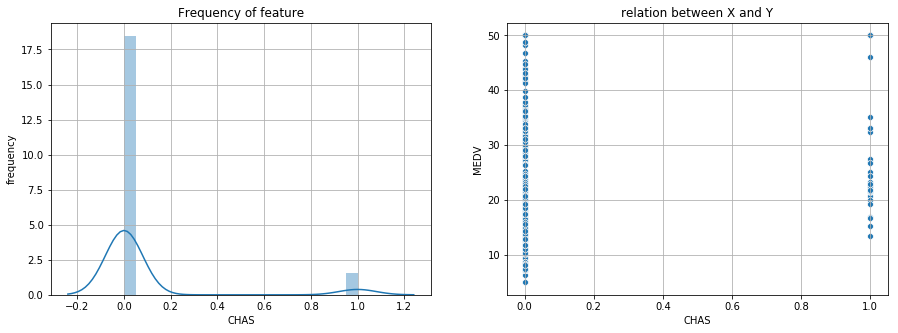

In [33]:
# 찰스강에 대한 더미 변수(강의 경계의 경우 1, 아니면 0)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['CHAS'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['CHAS'], train_y)
plt.show()

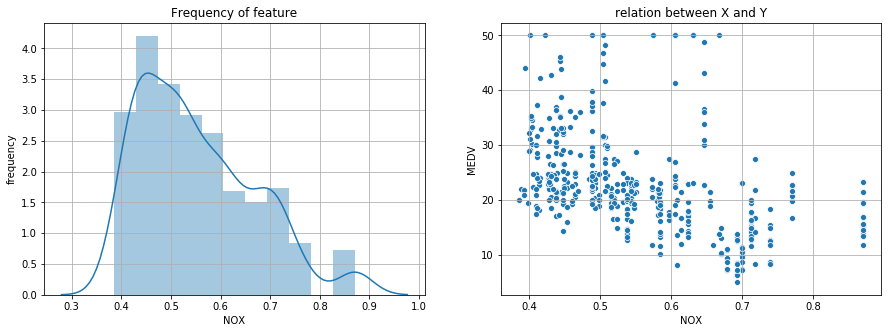

In [34]:
# 10ppm 당 농축 일산화탄소
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['NOX'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['NOX'], train_y)
plt.show()

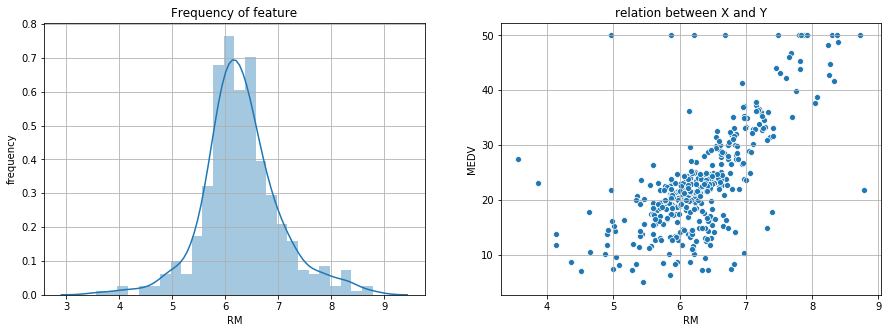

In [35]:
# 주택 1가구당 평균 방의 개수
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['RM'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['RM'], train_y)
plt.show()

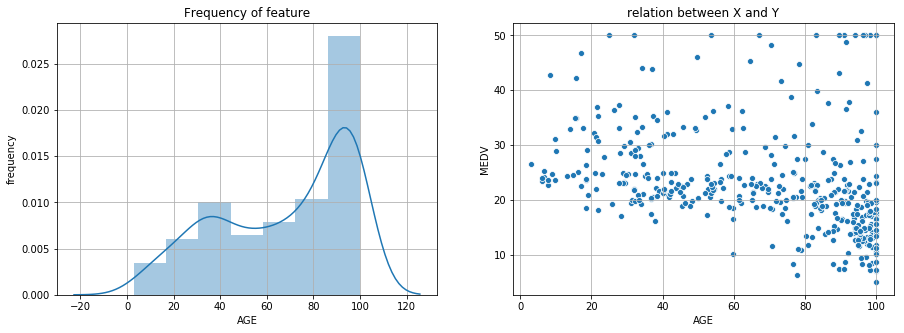

In [37]:
# 1940년 이전에 건축된 소유주택의 비율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['AGE'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['AGE'], train_y)
plt.show()

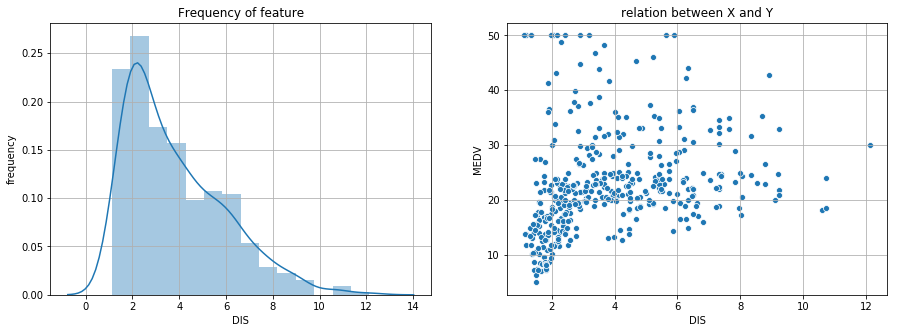

In [38]:
# 5개의 보스턴 직업센터까지의 접근성 지수
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['DIS'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['DIS'], train_y)
plt.show()

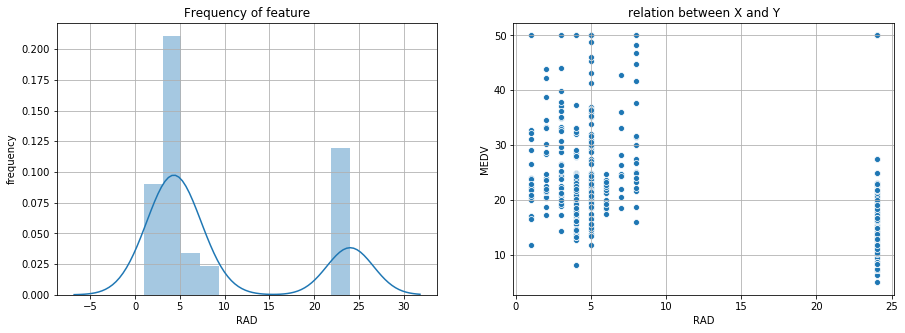

In [39]:
# 방사형 도로까지의 접근성 지수
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['RAD'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['RAD'], train_y)
plt.show()

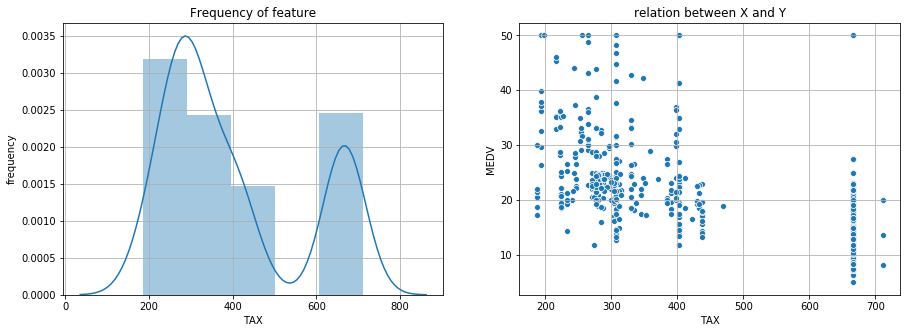

In [40]:
# 10,000 달러 당 재산세율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['TAX'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['TAX'], train_y)
plt.show()

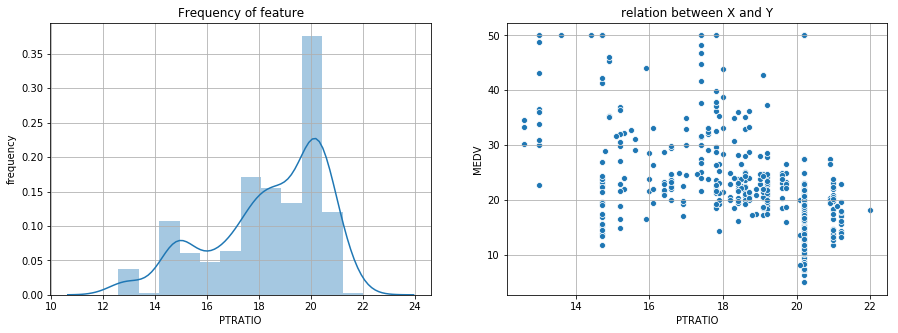

In [41]:
# 타운별 학생/교사 비율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['PTRATIO'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['PTRATIO'], train_y)
plt.show()

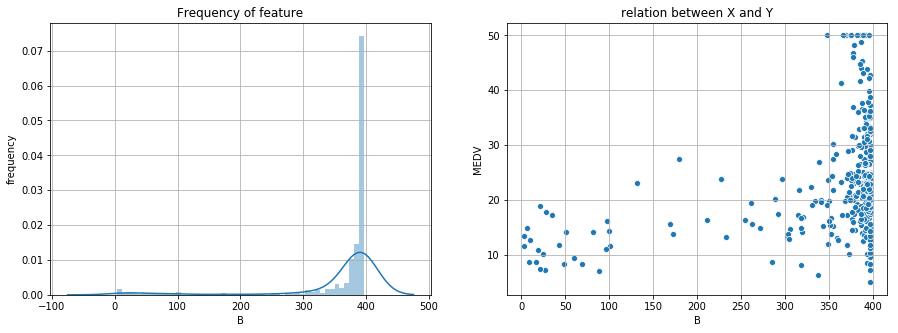

In [42]:
# 자치시 별 흑인 비율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['B'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['B'], train_y)
plt.show()

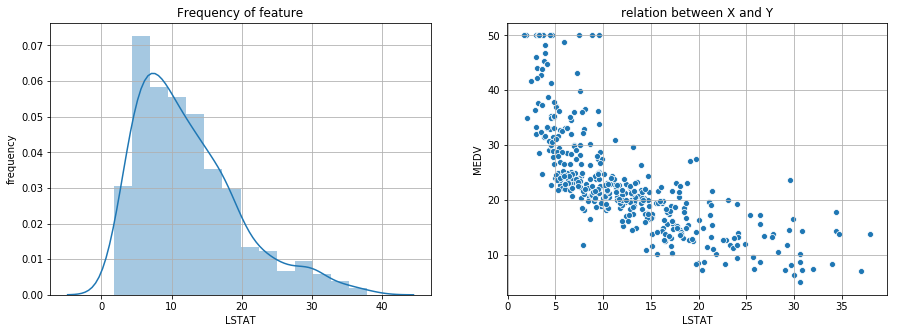

In [43]:
# 하위 계층 비율
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Frequency of feature")
plt.grid()
sns.distplot(train_x['LSTAT'])
plt.ylabel("frequency")
plt.subplot(122)
plt.title("relation between X and Y")
plt.grid()
sns.scatterplot(train_x['LSTAT'], train_y)
plt.show()

# 모델 학습 단계

## Model1 = Lasso regression(L1 regularization)

In [164]:
# Lasso Regression
clf_lasso = linear_model.Lasso(alpha=1.0, fit_intercept=False, normalize=True, tol=1e-6) 
clf_lasso.fit(train_x, train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-06, warm_start=False)

In [165]:
# 추정 계수 확인
coef_lasso = clf_lasso.coef_
print(coef_lasso)

[-0.03670378  0.04121776 -0.          0.          0.          4.03558104
  0.03271015 -0.17000814  0.07389608 -0.00641813 -0.09949015  0.01624475
 -0.53412134]


## Model2 = Ridge regression(L2 regularization) 

In [166]:
# Ridge Regression
clf_ridge = linear_model.Ridge(alpha=0.0, fit_intercept=False, normalize=True, tol=1e-6)
clf_ridge.fit(train_x, train_y)

Ridge(alpha=0.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06)

In [167]:
# 추정 계수 확인
coef_ridge = clf_ridge.coef_
print(coef_ridge)

[-8.61158712e-02  4.64502631e-02 -2.65007636e-02  2.71886515e+00
 -3.40834404e+00  5.88156430e+00 -5.06153133e-03 -9.42950569e-01
  1.70793544e-01 -8.68774357e-03 -4.00698002e-01  1.53968223e-02
 -3.85297737e-01]


<function matplotlib.pyplot.show(*args, **kw)>

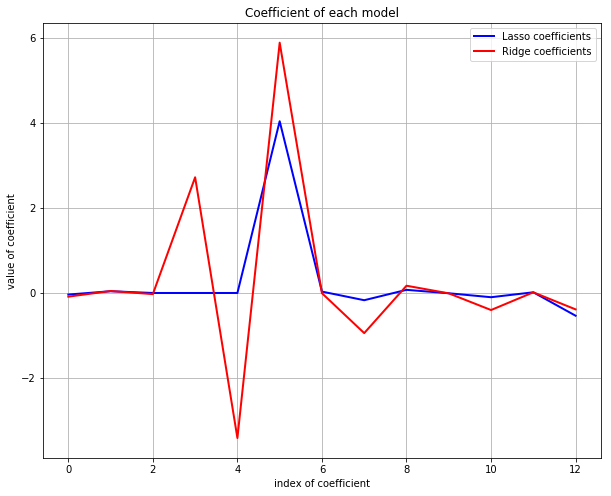

In [168]:
# Lasso vs Ridge 추정 계수 plot
plt.figure(figsize=(10, 8))
plt.title("Coefficient of each model")
plt.grid()
plt.plot(coefficient, color='blue', linewidth=2, label='Lasso coefficients')
plt.plot(coefficient_ridge, color='red', linewidth=2, label='Ridge coefficients')
plt.xlabel("index of coefficient")
plt.ylabel("value of coefficient")
plt.legend()
plt.show

# 예측 모형 적용 및 성능 평가

In [169]:
pred_y_lasso = clf_lasso.predict(test_x) # lasso를 이용한 예측
pred_y_ridge = clf_ridge.predict(test_x) # ridge를 이용한 예측

In [170]:
# plot을 위한 데이터 포맷 변환
pred_y_col_lasso = pd.Series(pred_y_lasso) # lasso 예측값을 Series 타입으로 변환
pred_y_col_ridge = pd.Series(pred_y_ridge) # ridge 예측값을 Series 타입으로 변환

test_y_col = pd.Series(test_y).reset_index(drop=True) # 인덱스 컬럼 생성

In [171]:
compare_y = pd.concat([ pred_y_col_lasso, pred_y_col_ridge, test_y_col] , axis=1) # [lasso, ridge, 테스트데이터 y] 열 병합
compare_y.columns = ["predict_lasso", "predict_ridge","real_MEDV"] # column 이름 생성
compare_y['index'] = compare_y.index # 인덱스 지정

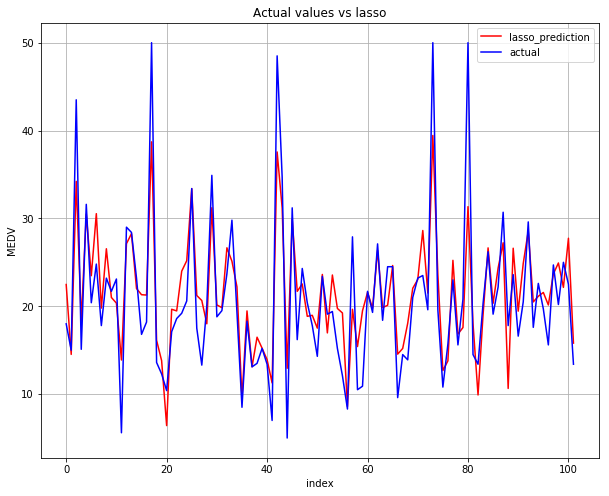

In [172]:
# 실제 데이터(파랑) vs Lasso 예측값(빨강) plot
plt.figure(figsize=(10, 8))
plt.title("Actual values vs lasso")
plt.grid()
plt.plot(compare_y['index'], compare_y['predict_lasso'], 'r-', label='lasso_prediction')
plt.plot(compare_y['index'], compare_y['real_MEDV'], 'b-', label='actual')
plt.xlabel("index")
plt.ylabel("MEDV")
plt.legend()
plt.show()

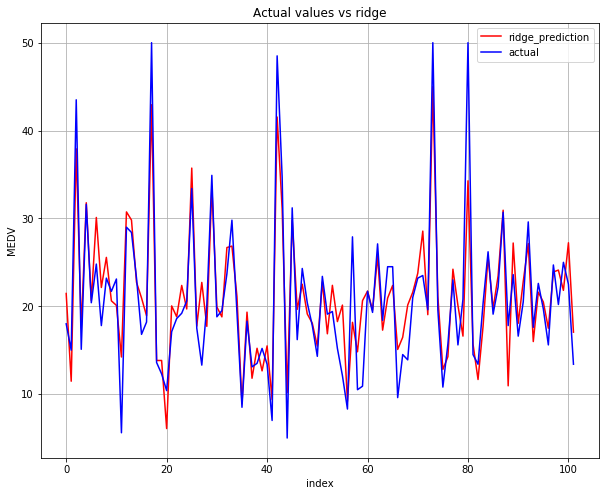

In [173]:
# 실제 데이터(파랑) vs Ridge 예측값(빨강) plot
plt.figure(figsize=(10, 8))
plt.title("Actual values vs ridge")
plt.grid()
plt.plot(compare_y['index'], compare_y['predict_ridge'], 'r-', label='ridge_prediction')
plt.plot(compare_y['index'], compare_y['real_MEDV'], 'b-', label='actual')
plt.xlabel("index")
plt.ylabel("MEDV")
plt.legend()
plt.show()

In [174]:
# Lasso R^2 value
clf_lasso.score(test_x, test_y)

0.7486259621705256

In [175]:
# Ridge R^2 value
clf_ridge.score(test_x, test_y)

0.8145234131230182